# Analyzze Comment

1. Importing Library

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import to_categorical

2. Loading Dataset

In [63]:
data=pd.read_csv('all_kindle_review.csv')
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'asin', 'helpful', 'rating', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary',
       'unixReviewTime'],
      dtype='object')

In [64]:
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [65]:
data.tail()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000
11999,11999,11398,B003370JUS,"[5, 6]",3,Taking Instruction is a look into the often hi...,"07 5, 2012",A3JUXLB4K9ZXCC,Dafna Yee,"If you like BDSM with a touch of romance, this...",1341446400


In [66]:
data=data.drop(columns=['summary','Unnamed: 0'])

In [67]:
data

,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,unixReviewTime
0,0,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,1283385600
1,1,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,1381190400
2,2,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,1397174400
3,3,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,1404518400
4,4,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,1356912000
...,...,...,...,...,...,...,...,...,...
11995,11995,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,1393545600
11996,11996,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,1305504000
11997,11997,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,1374796800
11998,11998,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",1379376000


In [68]:
# Converting 1,2,3 to 0 
# Converting 4,5 to 1

data.rating=data.rating.replace([1,2],0)
data.rating=data.rating.replace([3],1)
data.rating=data.rating.replace([4,5],2)

3. Checking for null values

In [69]:
data.isnull().sum()

Unnamed: 0.1       0
asin               0
helpful            0
rating             0
reviewText         0
reviewTime         0
reviewerID         0
reviewerName      38
unixReviewTime     0
dtype: int64

In [70]:
data.rating.value_counts()

rating
2    6000
0    4000
1    2000
Name: count, dtype: int64

4. Plotting Pie chart of the rating

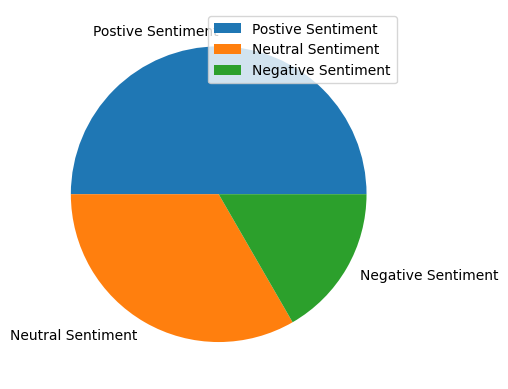

In [71]:
y = np.array([6000,4000, 2000])
mylabels = ["Postive Sentiment", "Neutral Sentiment", "Negative Sentiment"]

plt.pie(y, labels = mylabels)
plt.legend()
plt.show() 

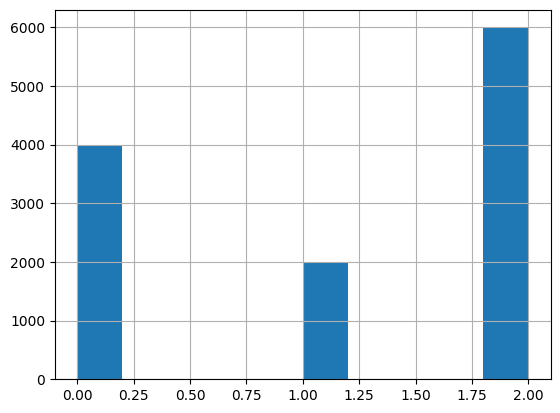

In [72]:
data.rating.hist()
plt.show()

In [73]:
my_data=data[:8000]
my_data

,Unnamed: 0.1,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,unixReviewTime
0,0,B0033UV8HI,"[8, 10]",1,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,1283385600
1,1,B002HJV4DE,"[1, 1]",2,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,1381190400
2,2,B002ZG96I4,"[0, 0]",1,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,1397174400
3,3,B002QHWOEU,"[1, 3]",1,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,1404518400
4,4,B001A06VJ8,"[0, 1]",2,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,1356912000
...,...,...,...,...,...,...,...,...,...
7995,7995,B002X8492M,"[0, 0]",1,I enjoyed the premise of this story. The story...,"03 12, 2013",A2CI2IJ40O9HHB,Ebony Johnson,1363046400
7996,7996,B000JML1QG,"[0, 0]",0,"Though these be the tales of the brothers, the...","04 20, 2013",A1PSYTEX4HIVAC,DimPoint,1366416000
7997,7997,B0030H26JS,"[0, 1]",0,"A short read, which was good in this case, as ...","02 19, 2013",AZ2EXXGD7FAD4,AvidReader,1361232000
7998,7998,B0029ZBK5S,"[0, 0]",2,In light of the fact that these stories are tr...,"09 20, 2013",A3L5L82GK6KPXN,Heal thyself,1379635200


In [74]:
my_data.rating.value_counts()

rating
2    4015
0    2641
1    1344
Name: count, dtype: int64

In [75]:
sentiment_label = my_data.rating.factorize()
sentiment_label

(array([0, 1, 0, ..., 2, 1, 1]), Index([1, 2, 0], dtype='int64'))

In [76]:
tweet = my_data.reviewText
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

5. LSTM (Long Short Term Memory)

LSTM stands for Long Short Term Memory Networks.
It is a variant of Recurrent Neural Networks.
Recurrent Neural Networks are usually used with sequential data such as text and audio.
Usually, while computing an embedding matrix, the meaning of every word and its calculations (which are called hidden states) are stored
If the reference of a word, let’s say a word is used after 100 words in a text, then all these calculations RNNs cannot store in its memory. That’s why RNNs are not capable of learning these long-term dependencies.
LSTMs on the other hand work well with such text. LSTM networks work well with time-series data.


Dropout is one of the regularization techniques. It is used to avoid overfitting. In the dropout mechanism, we drop some neurons randomly. The layer takes an argument, a number between 0 and 1 that represents the probability to drop the neurons. This creates a robust model avoiding overfitting.

![abc](LSTM.gif)

6. Building Model

In [77]:
y_categorical = to_categorical(my_data.rating, num_classes=3)
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid')) 
model.add(Dense(3, activation='softmax'))
# model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

d:\Lap trinh\AI_KienTrucThietKePhanMem\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_6             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [78]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.25,epochs=10,batch_size=64)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 3)

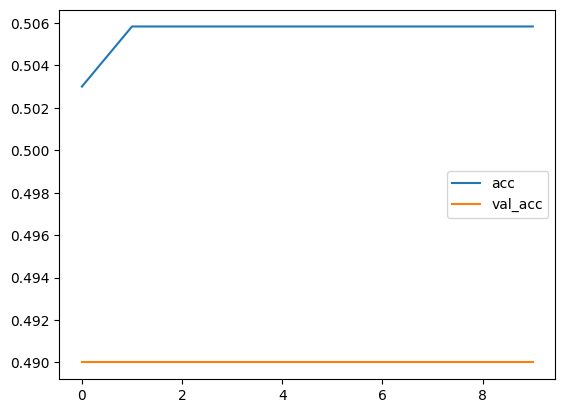

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

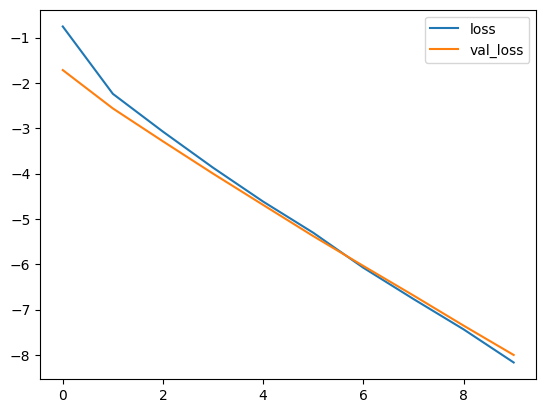

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


7. Prediction

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    return sentiment_label[1][prediction]
    
test_sentence1 = "I like this book."
prediction = predict_sentiment(test_sentence1)

if prediction == 0:
    print("Postive Statement")
elif prediction == 0.5:
    print("Neutral Statement")
else:
    print("Negative Statement")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
Negative Statement
